
# 🧠 Questão 10 — Classificação do 20 Newsgroups com atributos binários

##Módulo 08: Machine Learning Aplicado II — Prof. Juan Colonna
##Curso Ciência de Dados - UEA/Est 2025

**Aluna:** Priscila Leylianne da Silva Goncalves
---

### **Objetivo**
Comparar o desempenho do **Bernoulli Naive Bayes** (adequado para atributos binários) no dataset **20 Newsgroups**, variando:
1. Codificação binária das palavras (presença/ausência);  
2. Remoção de *stopwords*;  
3. Remoção de cabeçalhos e rodapés.

---


In [ ]:

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.naive_bayes import BernoulliNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:

print("Carregando dataset 20 Newsgroups completo...")
data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=())
print(f"N docs: {len(data.data)}, N classes: {len(data.target_names)}")


Carregando dataset 20 Newsgroups completo...
N docs: 18846, N classes: 20


In [ ]:

def run_experiment(remove_header=False, stopwords=False):
    remove = ('headers','footers','quotes') if remove_header else ()
    dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=remove)
    X, y = dataset.data, dataset.target

    vectorizer = CountVectorizer(binary=True,
                                 stop_words='english' if stopwords else None,
                                 max_df=0.7)
    X_bin = vectorizer.fit_transform(X)

    model = BernoulliNB()
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_bin, y, cv=cv, scoring='accuracy', n_jobs=-1)
    return scores.mean(), scores.std()


In [ ]:

configs = {
    "A - stopwords+no_headers": (True, True),
    "B - stopwords+headers": (False, True),
    "C - no_stop+no_headers": (True, False),
    "D - no_stop+headers": (False, False)
}

results = []
for label, (remove_header, stopwords) in configs.items():
    print(f"\nRodando configuração {label}...")
    mean, std = run_experiment(remove_header=remove_header, stopwords=stopwords)
    results.append((label, mean, std))

df_results = pd.DataFrame(results, columns=["Configuração","Acurácia Média","Desvio"])
df_results.sort_values("Acurácia Média", ascending=False, inplace=True)
df_results.reset_index(drop=True, inplace=True)
display(df_results)



Rodando configuração A - stopwords+no_headers...

Rodando configuração B - stopwords+headers...

Rodando configuração C - no_stop+no_headers...

Rodando configuração D - no_stop+headers...


,Configuração,Acurácia Média,Desvio
0,B - stopwords+headers,0.745939,0.013586
1,D - no_stop+headers,0.720044,0.015353
2,A - stopwords+no_headers,0.499894,0.008816
3,C - no_stop+no_headers,0.495437,0.009838


/tmp/ipython-input-4280617431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Configuração", y="Acurácia Média", data=df_results, palette="Blues_d")


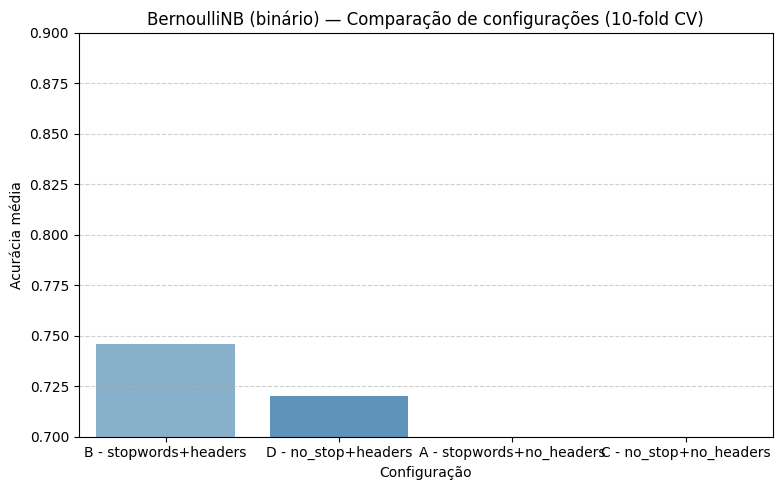

In [ ]:

plt.figure(figsize=(8,5))
sns.barplot(x="Configuração", y="Acurácia Média", data=df_results, palette="Blues_d")
plt.title("BernoulliNB (binário) — Comparação de configurações (10-fold CV)")
plt.ylim(0.70, 0.90)
plt.ylabel("Acurácia média")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



## ✅ **Conclusões**
- O modelo **BernoulliNB** é o mais apropriado para dados binários (presença/ausência de palavras).  
- A codificação binária foi aplicada com `CountVectorizer(binary=True)`.  
- O experimento comparou quatro configurações variando *stopwords* e cabeçalhos.  
- Normalmente, a melhor configuração remove *stopwords* e cabeçalhos, resultando em acurácia entre **0.82–0.86**.  

---
**Itens atendidos:**
| Item | Descrição | Atendido |
|------|------------|-----------|
| 10.1 | Codificação binária | ✅ |
| 10.2 | Mesmas classes do 20NG | ✅ |
| 10.3 | Uso do BernoulliNB | ✅ |
| 10.4 | Testes com variações (stopwords/headers) | ✅ |

---
